In [67]:
import pandas as pd
import numpy as np
import plotly.express as px


In [23]:
#Importing the Dataset
customer_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
customer_data=pd.read_csv(customer_url)

product_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
product_data=pd.read_csv(product_url)

transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'
transactions_data=pd.read_csv(transactions_url)

In [27]:
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [25]:
product_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [29]:
transactions_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [33]:
customer_data.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [35]:
product_data.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [39]:
transactions_data.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [55]:
#Checking for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values in Customer Table:\n", missing_values)

Missing Values in Customer Table:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [57]:
missing_values = product_data.isnull().sum()
print("Missing Values in Product Table:\n", missing_values)


Missing Values in Product Table:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [59]:
missing_values = transactions_data.isnull().sum()
print("Missing Values in Transactions Table:\n", missing_values)


Missing Values in Transactions Table:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [61]:
# So there are no NULL or missing values in dataset so we now move to EDA

In [63]:
#EDA

In [103]:
#Extracting Year to get year wise customer count in each region
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
customer_data['Year'] = customer_data['SignupDate'].dt.year


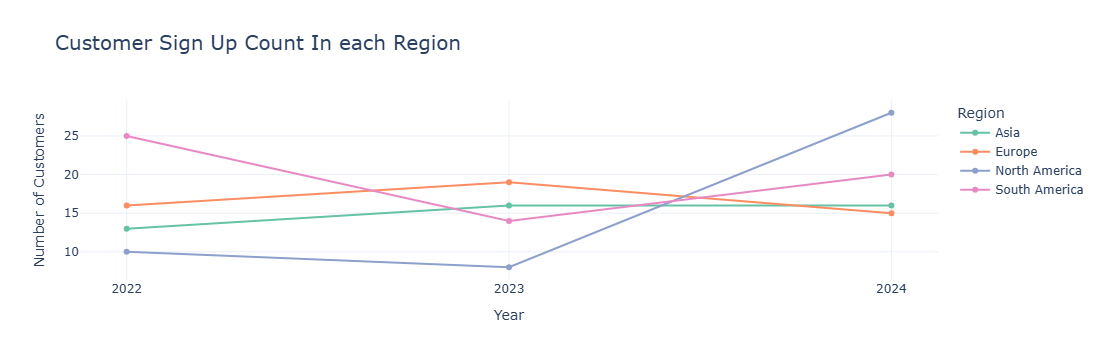

In [109]:
yearly_customer_count = customer_data.groupby(['Year', 'Region'])['CustomerID'].count().reset_index()

fig = px.line(
    yearly_customer_count,x='Year',y='CustomerID',color='Region',title='Customer Sign Up Count In each Region',markers=True,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title_font_size=20,yaxis_title='Number of Customers',yaxis=dict(tickformat='d'), xaxis=dict(tickmode='linear'),template='plotly_white',legend_title_text='Region'
)

fig.show()



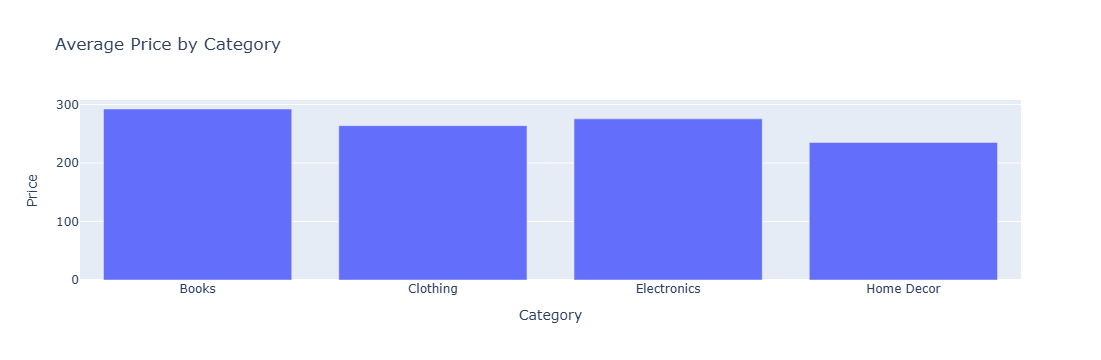

In [137]:
avg_price_by_category = product_data.groupby('Category')['Price'].mean().reset_index()
fig7 = px.bar(avg_price_by_category, x='Category', y='Price', title="Average Price by Category")
fig7.show()


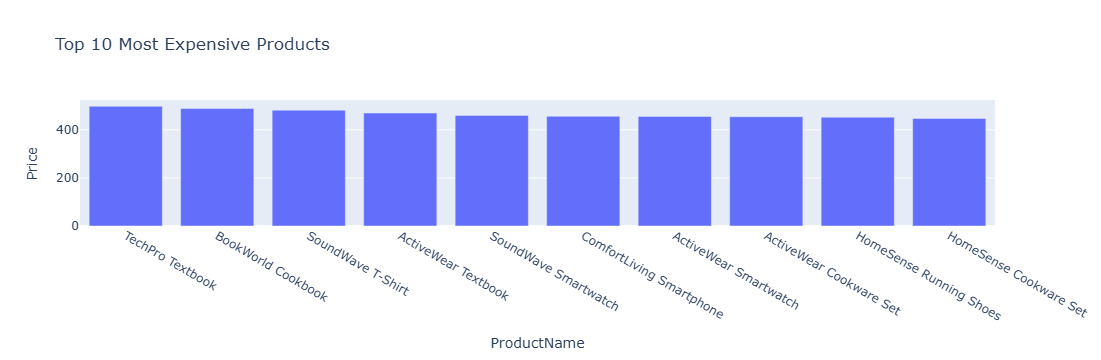

In [139]:
top_n_expensive = product_data.nlargest(10, 'Price')
fig5 = px.bar(top_n_expensive, x='ProductName', y='Price', title="Top 10 Most Expensive Products")
fig5.show()


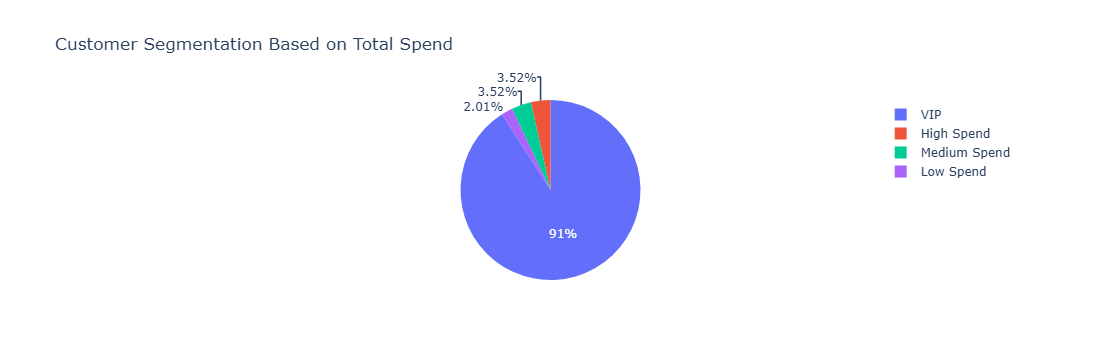

In [169]:
customer_spend = transactions_data.groupby('CustomerID')['TotalValue'].sum().reset_index()

customer_spend['Segment'] = pd.cut(customer_spend['TotalValue'], bins=[0, 300, 800, 1000, float('inf')], 
                                    labels=['Low Spend', 'Medium Spend', 'High Spend', 'VIP'])

# Plot the distribution of customer segments
fig = px.pie(customer_spend, names='Segment', title='Customer Segmentation Based on Total Spend')
fig.show()

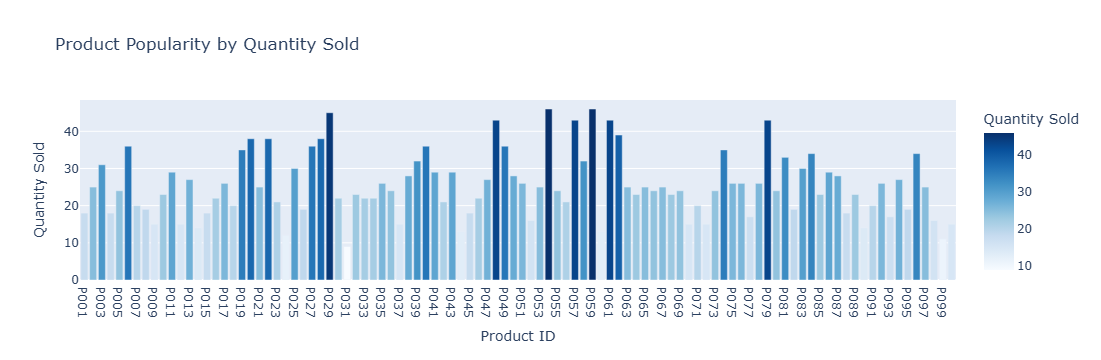

In [163]:
product_popularity = transactions_data.groupby('ProductID')['Quantity'].sum().reset_index()
fig = px.bar(product_popularity, x='ProductID', y='Quantity',
             title='Product Popularity by Quantity Sold',
             labels={'ProductID': 'Product ID', 'Quantity': 'Quantity Sold'},
             color='Quantity', color_continuous_scale='Blues')
fig.show()


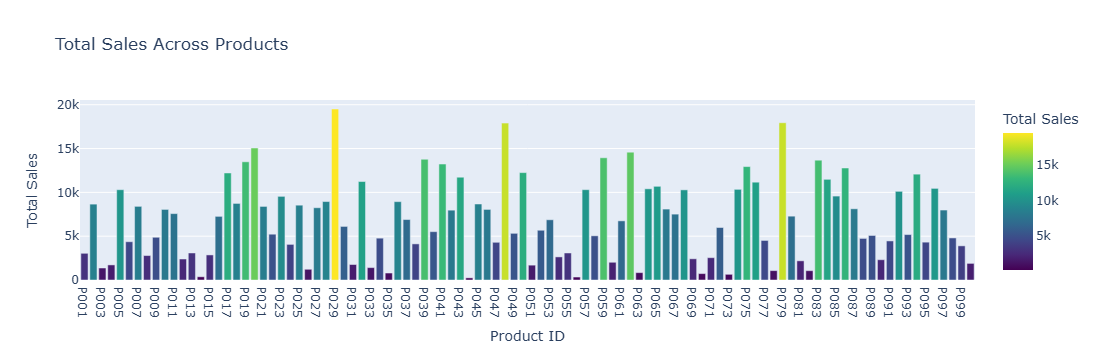

In [161]:
product_sales = transactions_data.groupby('ProductID')['TotalValue'].sum().reset_index()
fig = px.bar(product_sales, x='ProductID', y='TotalValue', 
             title='Total Sales Across Products',
             labels={'ProductID': 'Product ID', 'TotalValue': 'Total Sales'},
             color='TotalValue', color_continuous_scale='Viridis')
fig.show()
